## EDA

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("./wrangled_data.csv")

In [23]:
df.dtypes

sepal_length             float64
sepal_width              float64
petal_length             float64
petal_width              float64
class_Iris-setosa          int64
class_Iris-versicolor      int64
class_Iris-virginica       int64
dtype: object

In [24]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


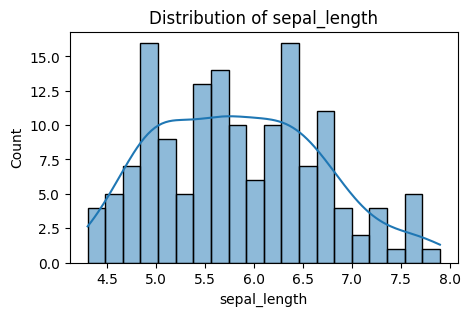

In [25]:
# Distribution of sepal_length

fig = plt.figure(figsize=(5,3))
sns.histplot(df["sepal_length"],bins=20,kde=True)
plt.title("Distribution of sepal_length")
plt.show()

In [26]:
print("Mean of sepal_length:",df["sepal_length"].mean())
print("Standard Deviation of sepal_length:",df["sepal_length"].std())
print("Skewness of sepal_length:",df["sepal_length"].skew())

Mean of sepal_length: 5.843333333333334
Standard Deviation of sepal_length: 0.828066127977863
Skewness of sepal_length: 0.3149109566369728


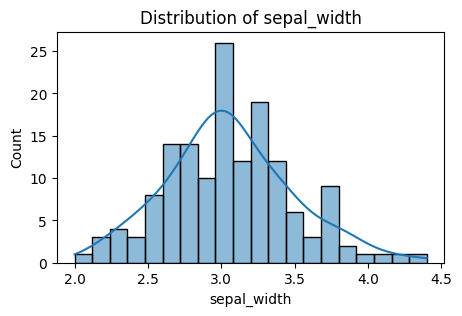

In [27]:
# Distribution of sepal_width

fig = plt.figure(figsize=(5,3))
sns.histplot(df["sepal_width"],bins=20,kde=True)
plt.title("Distribution of sepal_width")
plt.show()

In [28]:
print("Mean of sepal_width:",df["sepal_width"].mean())
print("Standard Deviation of sepal_width:",df["sepal_width"].std())
print("Skewness of sepal_width:",df["sepal_width"].skew())

Mean of sepal_width: 3.0540000000000003
Standard Deviation of sepal_width: 0.4335943113621737
Skewness of sepal_width: 0.3340526621720866


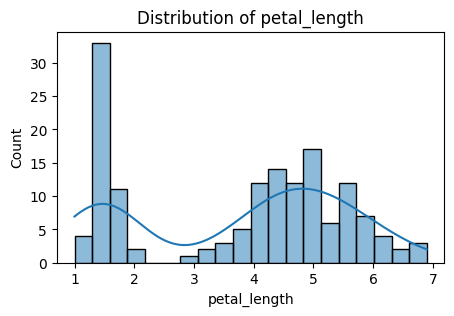

Mean of petal_length: 3.758666666666666
Standard Deviation of petal_length: 1.7644204199522626
Skewness of petal_length: -0.27446425247378287


In [29]:
# Distribution of petal_length

fig = plt.figure(figsize=(5,3))
sns.histplot(df["petal_length"],bins=20,kde=True)
plt.title("Distribution of petal_length")
plt.show()
print("Mean of petal_length:",df["petal_length"].mean())
print("Standard Deviation of petal_length:",df["petal_length"].std())
print("Skewness of petal_length:",df["petal_length"].skew())

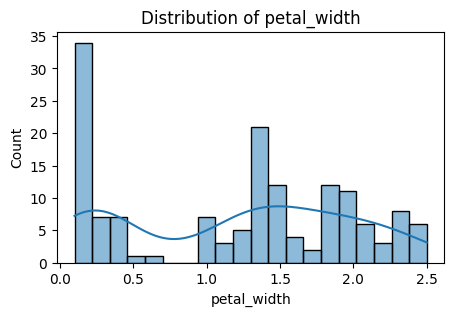

Mean of petal_width: 1.1986666666666668
Standard Deviation of petal_width: 0.7631607417008411
Skewness of petal_width: -0.10499656214412734


In [30]:
# Distribution of petal_width

fig = plt.figure(figsize=(5,3))
sns.histplot(df["petal_width"],bins=20,kde=True)
plt.title("Distribution of petal_width")
plt.show()
print("Mean of petal_width:",df["petal_width"].mean())
print("Standard Deviation of petal_width:",df["petal_width"].std())
print("Skewness of petal_width:",df["petal_width"].skew())

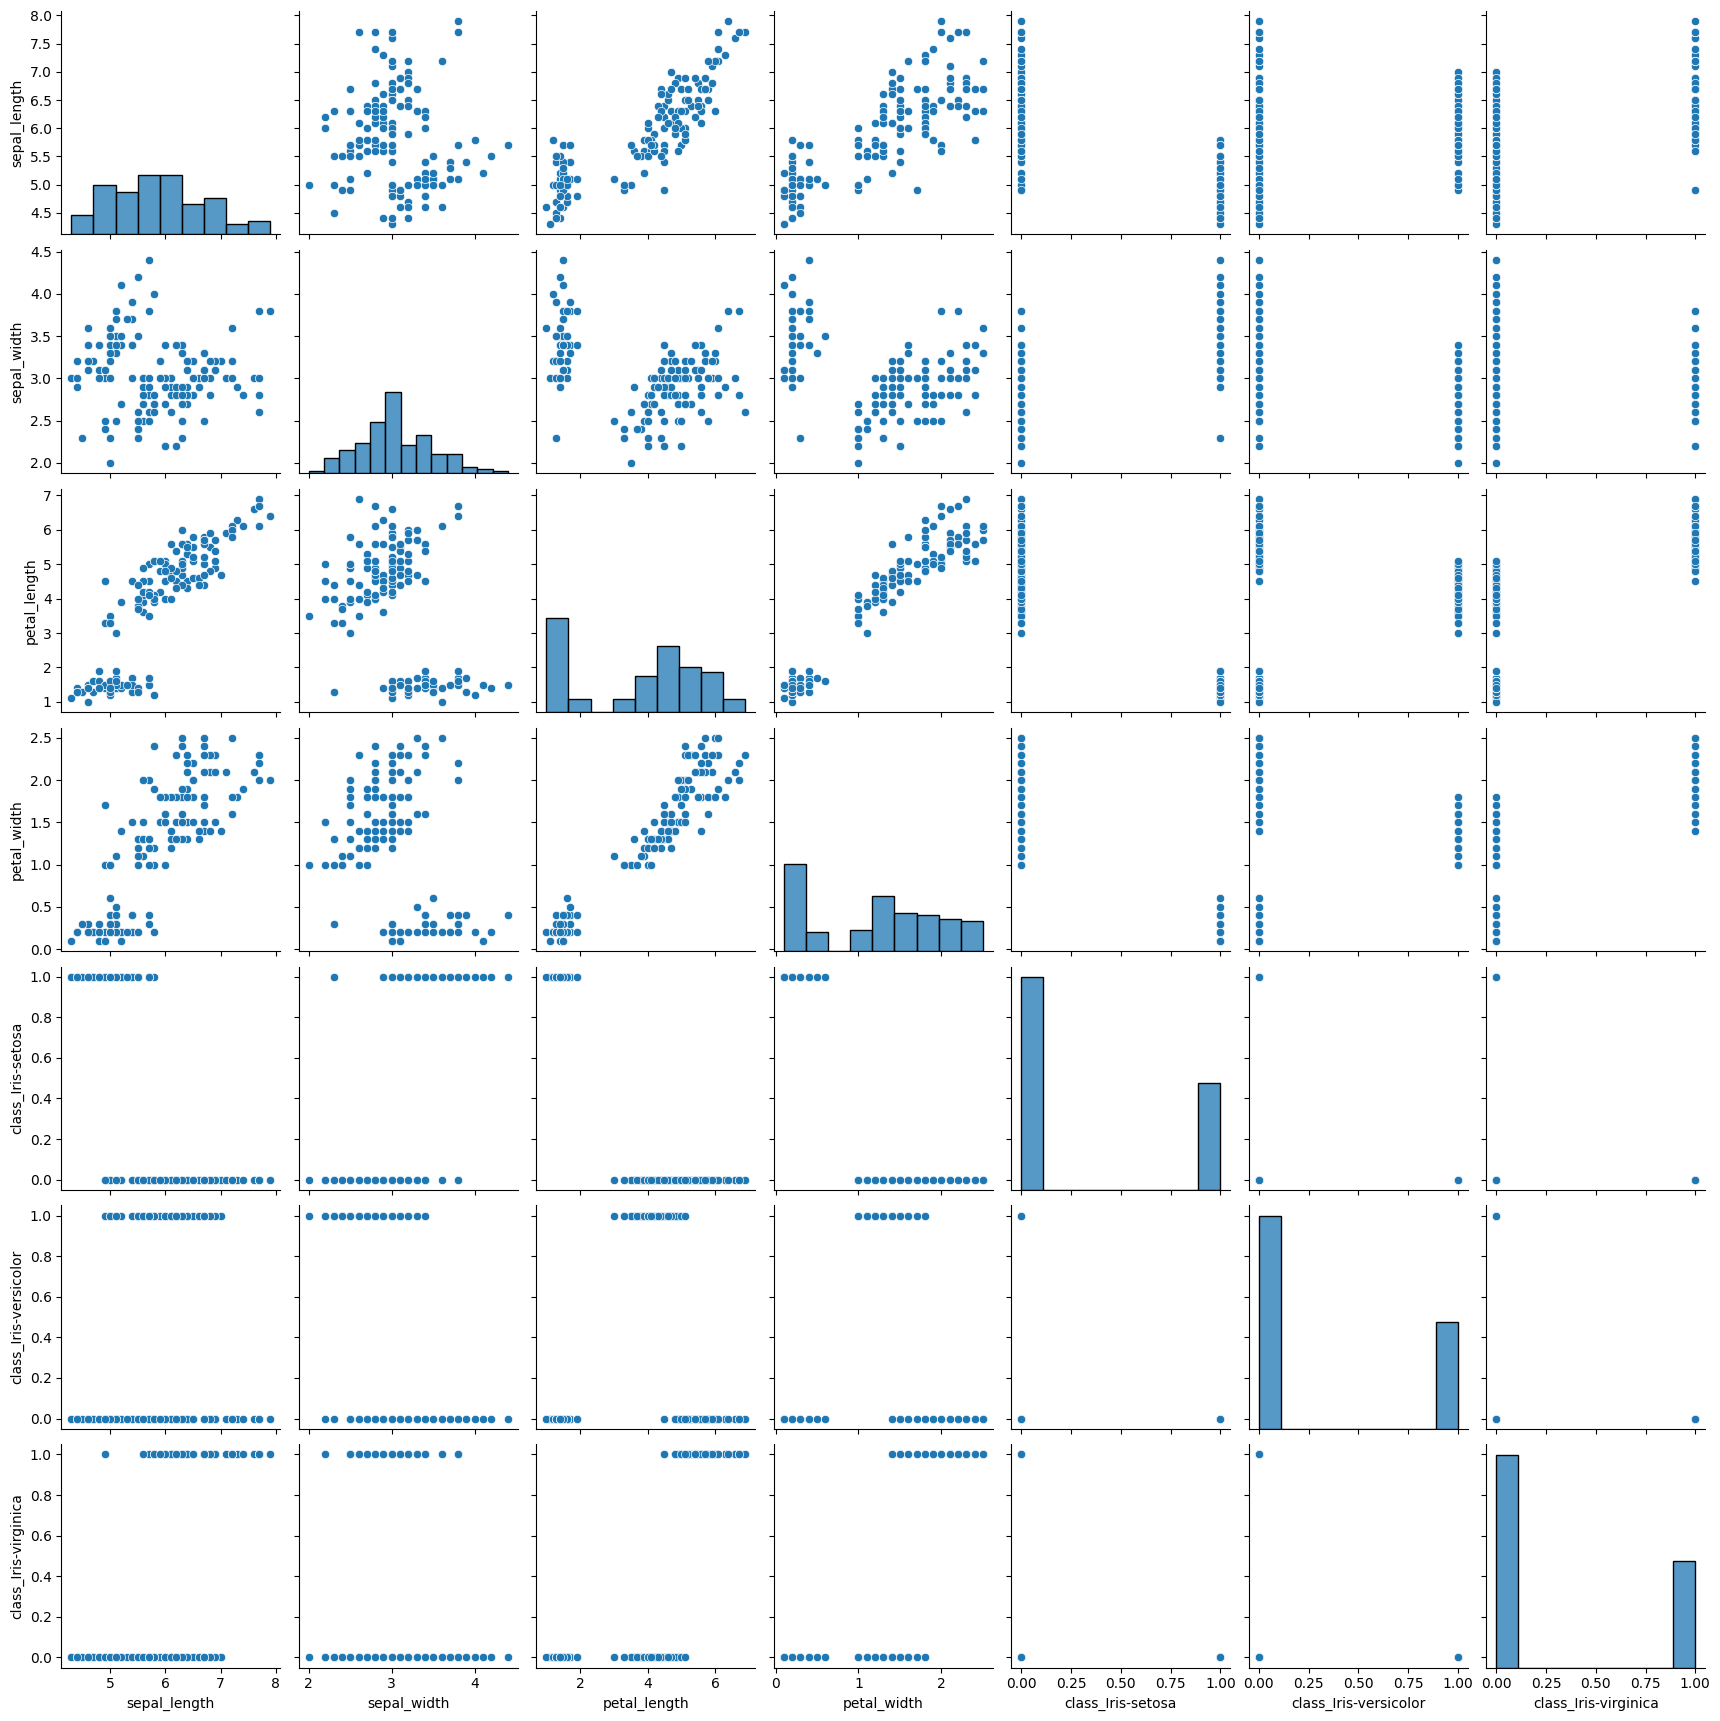

In [31]:
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

sns.pairplot(df)

plt.show()

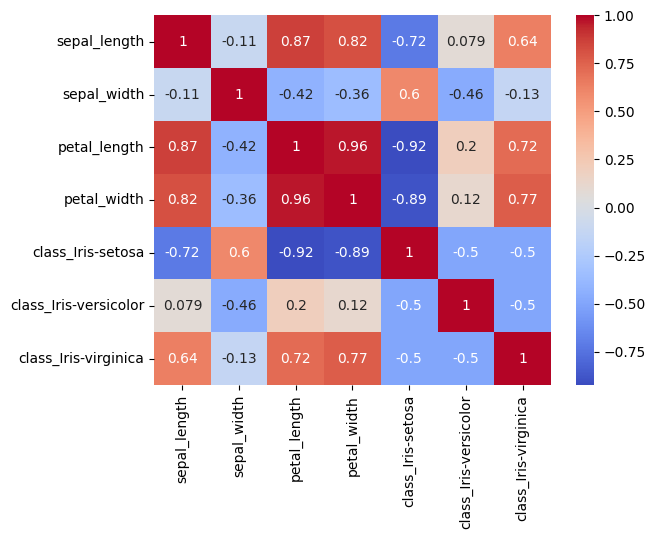

In [32]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm')

plt.show()

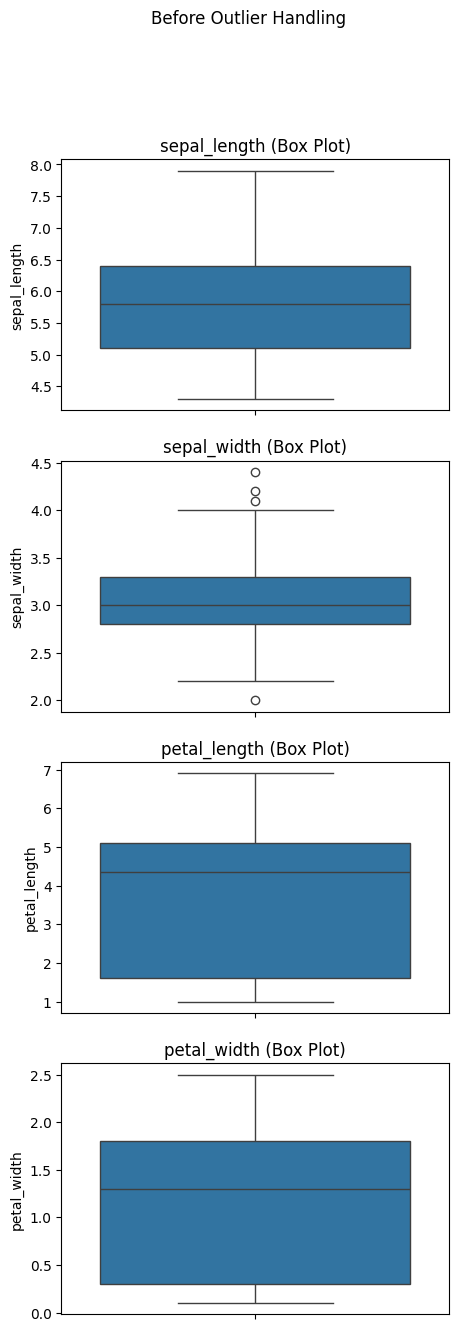

In [33]:
fig = plt.figure(figsize=(5,15))

plt.subplot(4,1,1)
sns.boxplot(df, y="sepal_length")
plt.title("sepal_length (Box Plot)")

plt.subplot(4,1,2)
sns.boxplot(df, y="sepal_width")
plt.title("sepal_width (Box Plot)")

plt.subplot(4,1,3)
sns.boxplot(df, y="petal_length")
plt.title("petal_length (Box Plot)")

plt.subplot(4,1,4)
sns.boxplot(df, y="petal_width")
plt.title("petal_width (Box Plot)")

plt.suptitle("Before Outlier Handling")

plt.show()

### Outlier Handling for sepal_width

In [34]:
df_edit = df.copy()

In [35]:
median = df["sepal_width"].median()

q1 = df["sepal_width"].quantile(0.25)
q3 = df["sepal_width"].quantile(0.75)
iqr = q3 - q1       # Inter Quartile Range

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

df_edit.loc[df_edit["sepal_width"]>upper_bound, "sepal_width"] = upper_bound
df_edit.loc[df_edit["sepal_width"]<lower_bound, "sepal_width"] = lower_bound

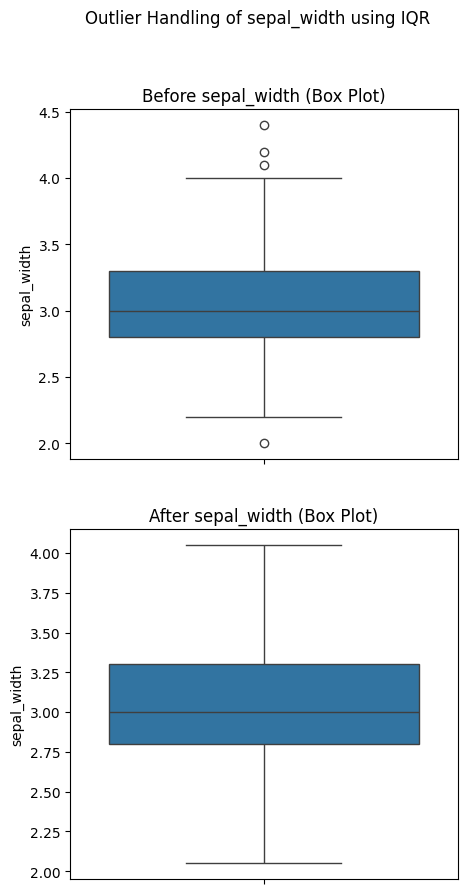

In [36]:
fig = plt.figure(figsize=(5,10))

plt.subplot(2,1,1)
sns.boxplot(df, y="sepal_width")
plt.title("Before sepal_width (Box Plot)")

plt.subplot(2,1,2)
sns.boxplot(df_edit, y="sepal_width")
plt.title("After sepal_width (Box Plot)")

plt.suptitle("Outlier Handling of sepal_width using IQR")

plt.show()

In [37]:
df_edit.to_csv("./train.csv", index=False)

In [38]:
df_edit['class'] = df_edit[df_edit.columns[4:7]].idxmax(axis=1)  # gets column name with max value
df_edit['class'] = df_edit['class'].str.replace('class_', '')
df_edit2 = df_edit.drop(columns=['class_Iris-setosa', 'class_Iris-versicolor', 'class_Iris-virginica'])

In [39]:
df_edit2.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
df_edit2.to_csv("./train2.csv", index=False)